# Module 6 Assignment


A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)


In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as stats

import pandas as pd
import seaborn as sns

from nose.tools import assert_almost_equal, assert_equal, assert_is_instance, assert_is_not

import matplotlib as mpl
import matplotlib.pyplot as plt

# Problem 1: Calculating a Simple Probability

Write a function called `probability_calc` that takes in the number of observed heads from a coin flip experiment and the total number of coin flips, and returns the probability that the coin lands on heads.

In [2]:
def probability_calc(num_heads,n):
    """
    Inputs
    ------
    
    num_heads: an integer, the number of heads observed
    
    n: an integer, the total number of coin flips
    
    Output
    ------
    
    prob: the probability of the coin landing on heads
    """    
    
    ### YOUR CODE HERE
    prob = num_heads/n
    
    return prob

In [3]:
my_prob = probability_calc(37, 233)
assert_almost_equal(my_prob, 0.15879828326180256)

# Problem 2: Using Bayes Theorem

Write a function called `bayes_calc` which takes in the probability of event $A$, and the probability of event $B$ and return $P(A|B)$. Assume that $A$ and $B$ are independent events.

In [4]:
def bayes_calc(prob_A, prob_B):
    """
    Inputs
    -------
    
    prob_A: a float, the probability of event A
    
    prob_B: a float, the probability of event B
    
    Output
    ------
    
    prob: the probability of event A given event B
    
    """
    
    ### YOUR CODE HERE
    # Probability of event A given event B is equal to the probability of event A
    prob = prob_A
    
    return prob

In [5]:
my_prob = bayes_calc(15 / 66, 13 / 68)
assert_almost_equal(my_prob, 0.227272, places=5)

In [6]:
# Read in dow jones index dataset
df = pd.read_csv('./dow_jones_index.data')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


# Problem 3: Possion distribution of columns from dow jones dataset
In this problem you'll finish writing the `plot_poisson` function. A dataframe of the dow jones dataset and the column name are passed into this function. Your task is to:
- plot the PMF of the Poisson distribution for column `col` using the `bar` function from the Axes object.
    - Use the mean of the column to create the Poisson distirbution
    - The number of points is given by `n_pts`
- Your plot should contain a label for the x and y axis and also have a title.
- Return the `axes` object

In [7]:
from scipy.stats import poisson

def plot_poisson(df, col='open', n_pts=100):
    '''
    df: dataframe containg data from dow jones index
    col: column name in df variable
    n_pts: number of points
    returns axes object
    '''
    # Define plot layout
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ### YOUR CODE HERE
    col_mean = df[col].mean()
    x = np.arange(n_pts)
    
    ax.set_title("Dow Open Poisson")
    ax.set_xlim(-5, 105)
    ax.set_xlabel("n_pts")
    ax.set_ylabel(" ") 
    
    plt.bar(x, poisson.pmf(x, col_mean))
    
    return ax

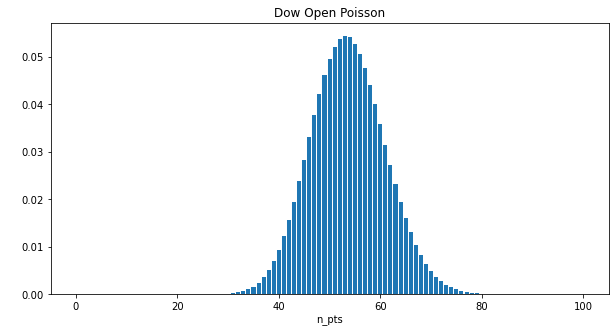

In [8]:
ch = plot_poisson(df,'open')

In [9]:
from helper import pp
print("Your Plot should look similar to this:")
sol = pp(df)

assert_is_instance(ch, mpl.axes.Axes, msg='Return a Axes object.')  
assert_is_instance(ch, mpl.axes.Axes, msg='Return a Axes object.')  
assert_is_not(len(ch.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ch.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ch.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")
assert_equal(len(ch.patches), len(sol.patches), msg="Your bar graph doesn't have the correct number patches. Make sure you use the n_pts parameter. ")
for student_patch, solution_patch in zip(ch.patches, sol.patches):
    assert_equal(student_patch.get_width(), solution_patch.get_width(), msg='')
    assert_equal(student_patch.get_height(), solution_patch.get_height(), msg='')


ModuleNotFoundError: No module named 'helper'

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 